In [18]:
import numpy as np
import json
import matplotlib.pyplot as plt


def plot_all(model_name, task, task_lang, tokenid_to_lang_path, langs_to_plot, ckpts_to_plot):
    numpy_vals = []
    for ckpt in ckpts_to_plot:
        numpy_vals.append(np.load(f"{model_name}/{ckpt}/{task_lang}_{task}.npy"))
    numpy_vals = np.array(numpy_vals)
    print(numpy_vals.shape)

    with open(tokenid_to_lang_path, "r") as f:
        tokenid_to_lang = json.load(f)
    lang_to_tokenids = {}
    for id_ in tokenid_to_lang:
        lang = tokenid_to_lang[id_]
        if lang not in lang_to_tokenids:
            lang_to_tokenids[lang] = []
        lang_to_tokenids[lang].append(id_)
    lang_to_langid = {}
    i = 0
    for lang in lang_to_tokenids:
        lang_to_langid[lang] = i
        i += 1
    plot_lang_to_langids = {x: lang_to_langid[x] for x in langs_to_plot}
    print(plot_lang_to_langids)

    numpy_vals = numpy_vals[:, :, list(plot_lang_to_langids.values())]
    print(numpy_vals.shape)
    
    num_rows = int(np.ceil(len(ckpts_to_plot) / 3))
    plt.subplots(nrows = num_rows, ncols = 3, figsize=(15, 5 * num_rows))
    for i in range(len(ckpts_to_plot)):
        plt.subplot(num_rows, 3, i + 1)
        plt.plot(numpy_vals[i])
        plt.title(f"Checkpoint {ckpts_to_plot[i]}")
        plt.xlabel("Layers")
        plt.ylabel("Prob(lang)")
        plt.legend(langs_to_plot)
    plt.tight_layout()
    plt.show()

(6, 31, 94)
{'or': 28, 'en': 0, 'de': 2, 'es': 4}
(6, 31, 4)


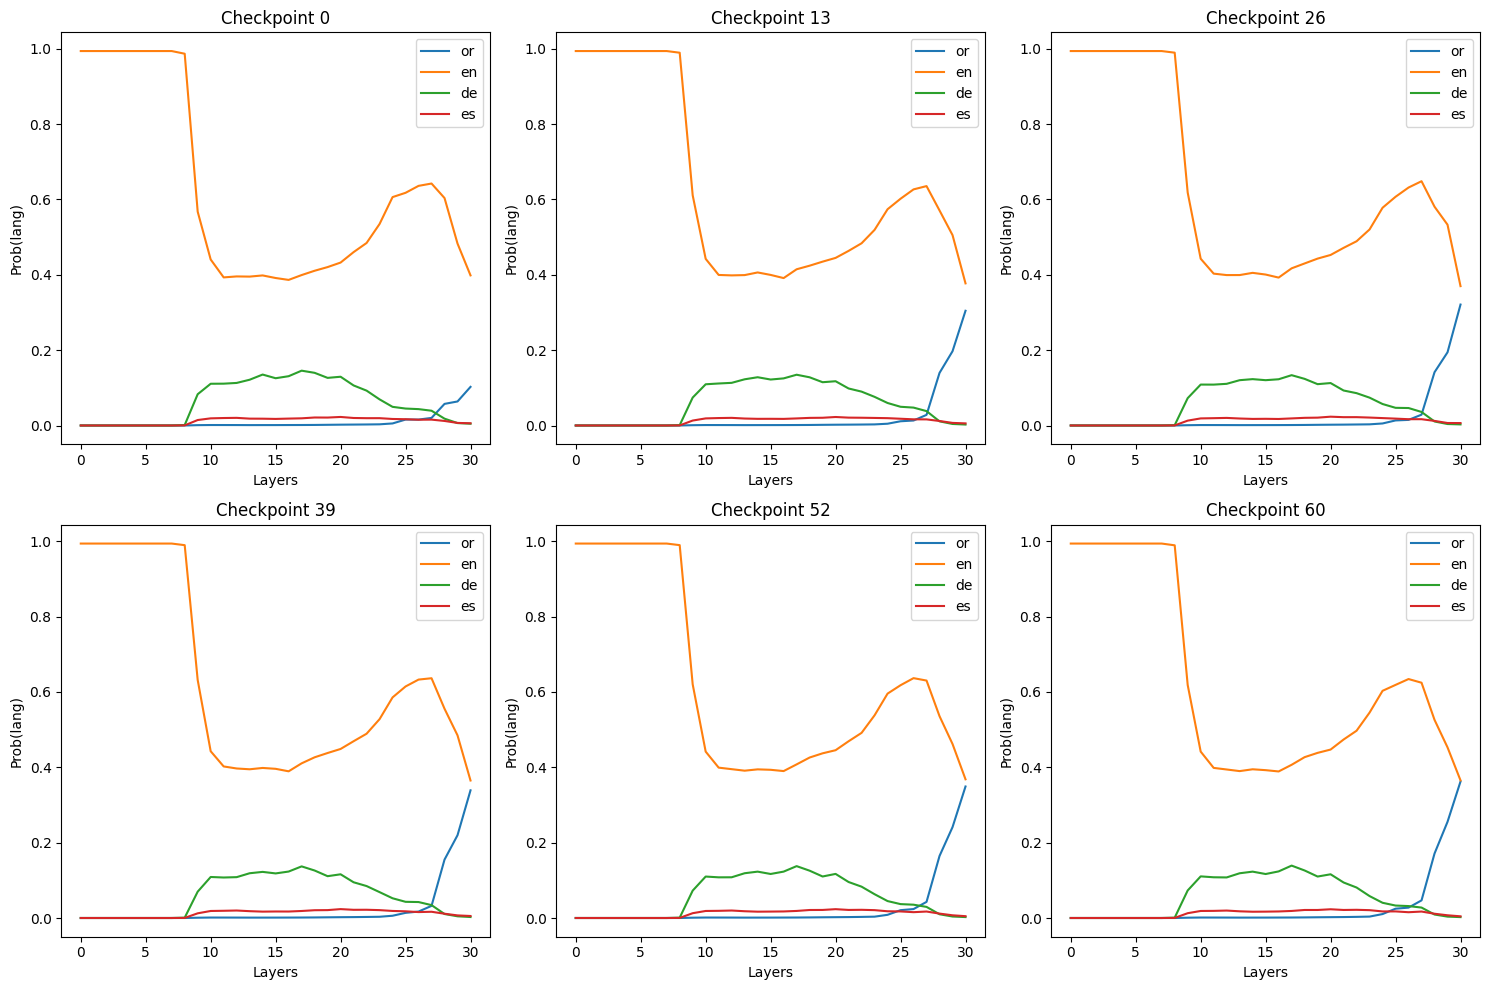

In [19]:
plot_all(
    model_name = "models/bloomz/bloomz_de_RA_DS=103_lora_qkv",
    task = "xquad",
    task_lang = "or",
    tokenid_to_lang_path = "tokenid_to_lang/bloomz.json",
    langs_to_plot = ["or", "en", "de", "es"],
    ckpts_to_plot = [0, 13, 26, 39, 52, 60]
)

(6, 31, 94)
{'or': 28, 'en': 0, 'de': 2, 'es': 4}
(6, 31, 4)


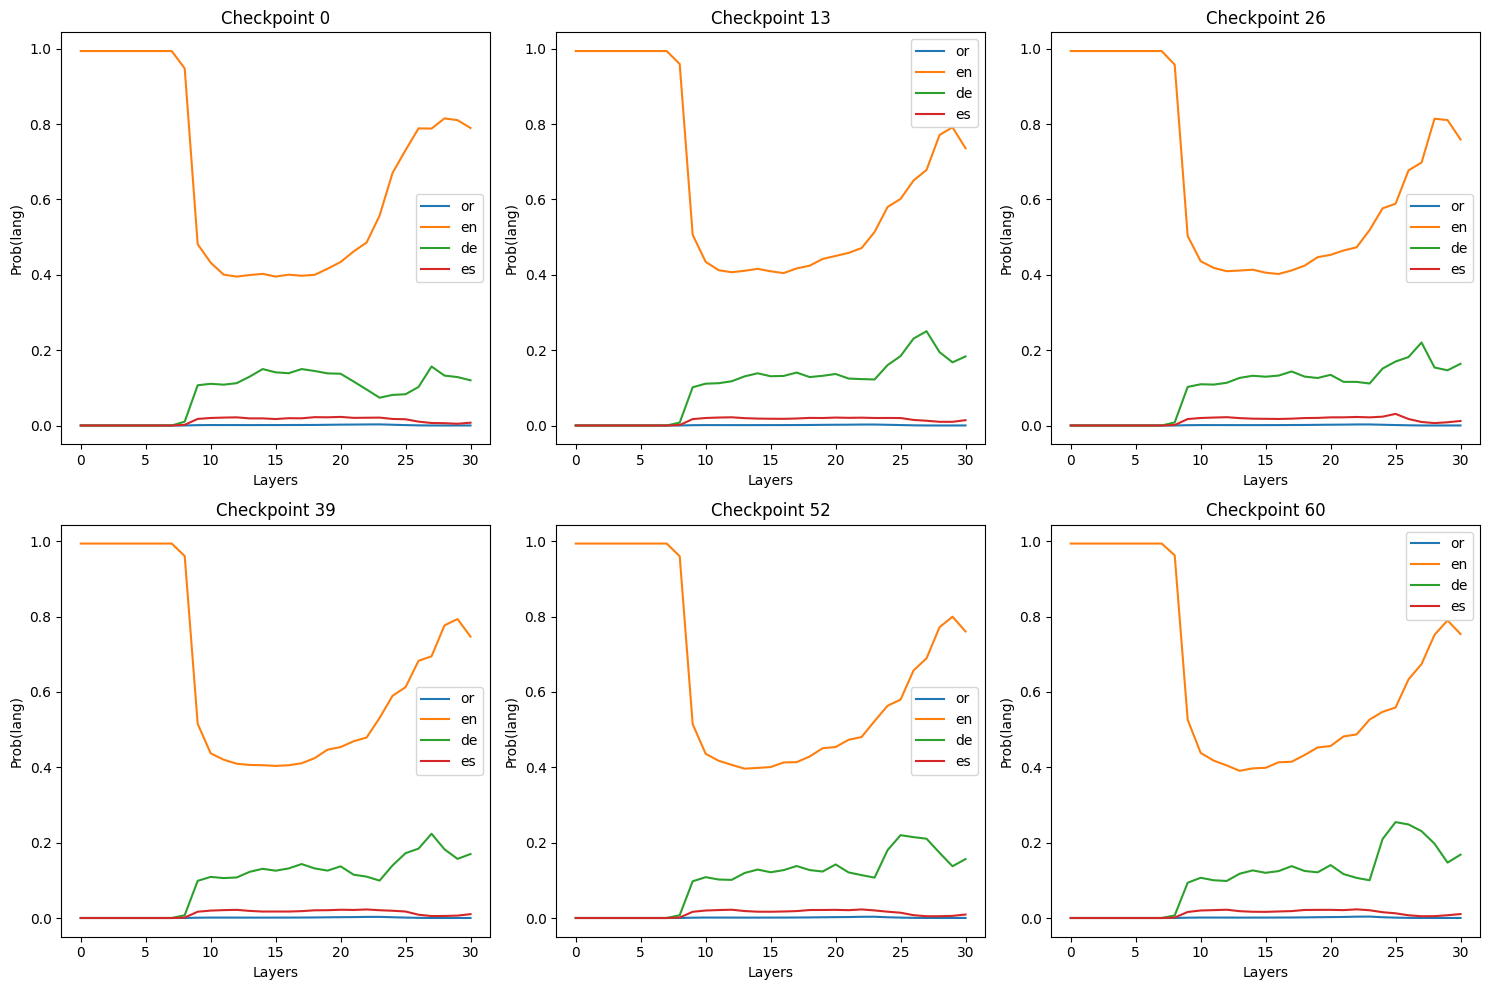

In [20]:
plot_all(
    model_name = "models/bloomz/bloomz_de_RA_DS=103_lora_qkv",
    task = "xquad",
    task_lang = "de",
    tokenid_to_lang_path = "tokenid_to_lang/bloomz.json",
    langs_to_plot = ["or", "en", "de", "es"],
    ckpts_to_plot = [0, 13, 26, 39, 52, 60]
)

(6, 31, 94)
{'or': 28, 'en': 0, 'de': 2, 'es': 4}
(6, 31, 4)


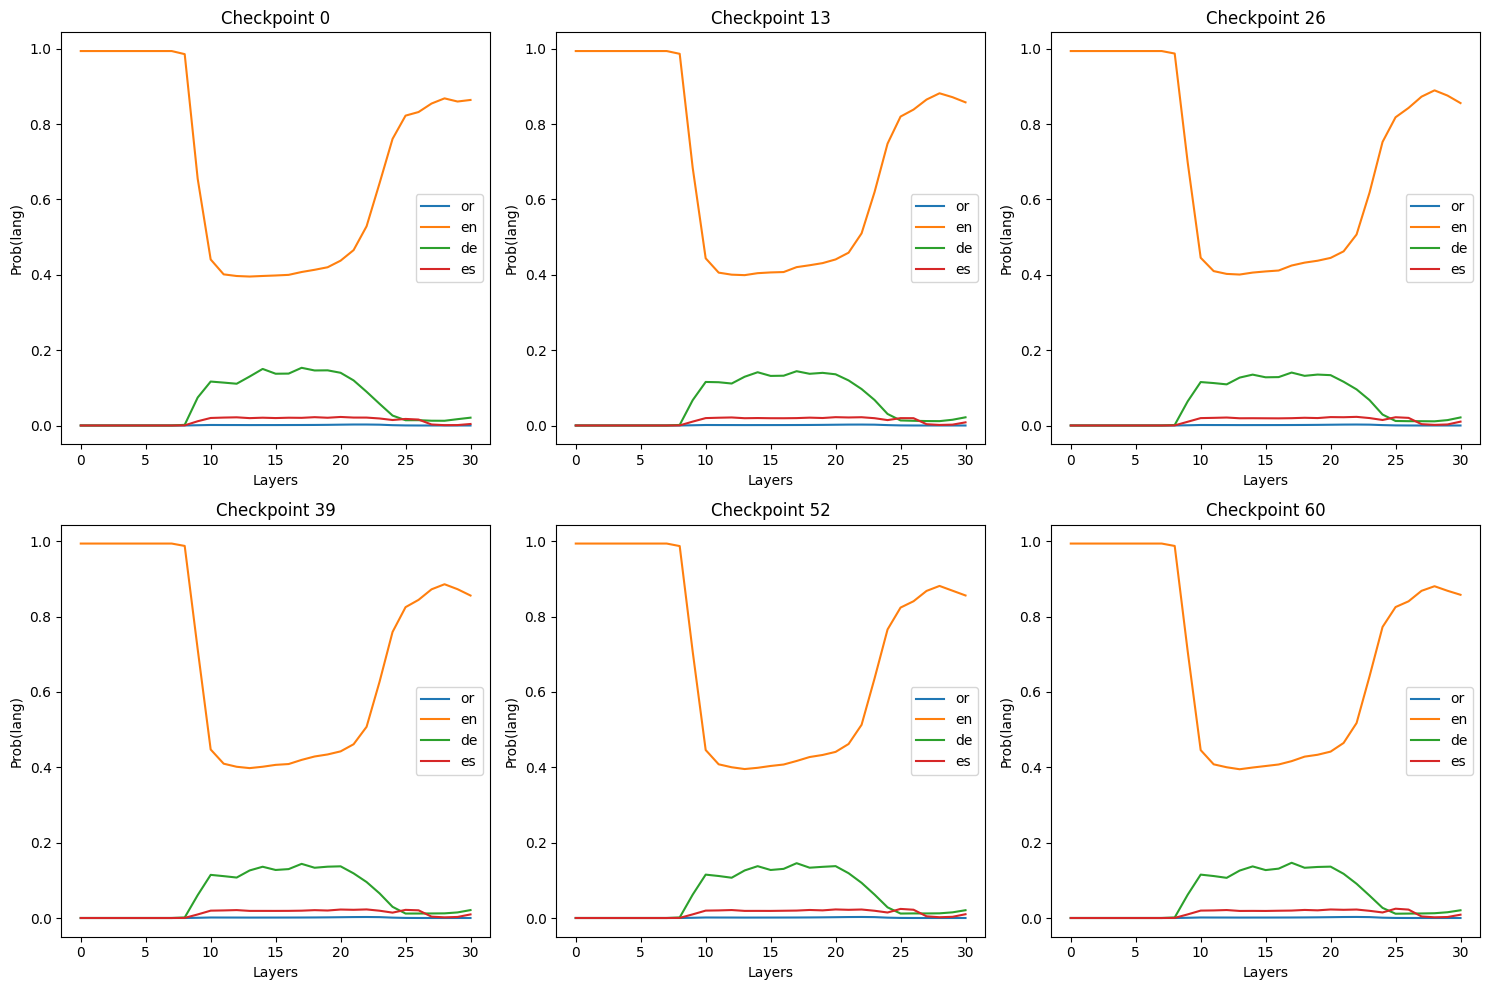

In [22]:
plot_all(
    model_name = "models/bloomz/bloomz_de_RA_DS=103_lora_qkv",
    task = "xquad",
    task_lang = "en",
    tokenid_to_lang_path = "tokenid_to_lang/bloomz.json",
    langs_to_plot = ["or", "en", "de", "es"],
    ckpts_to_plot = [0, 13, 26, 39, 52, 60]
)